<class 'pandas.core.panel.Panel'>
Dimensions: 300 (items) x 1077 (major_axis) x 4 (minor_axis)
Items axis: 000001.XSHE to 603993.XSHG
Major_axis axis: 2013-01-04 15:00:00 to 2017-06-13 15:00:00
Minor_axis axis: FinancingCashGrowRate to SFY12P
                     000001.XSHE  000002.XSHE  000008.XSHE  000009.XSHE  \
2005-01-04 15:00:00       6.5199       5.2699       8.3800       3.3700   
2005-01-05 15:00:00       6.4600       5.4600       8.6000       3.4300   
2005-01-06 15:00:00       6.5199       5.4300       8.6000       3.4100   
2005-01-07 15:00:00       6.5100       5.4800       8.8400       3.4800   
2005-01-10 15:00:00       6.5900       5.4500       9.2800       3.5700   
2005-01-11 15:00:00          NaN       5.5100       9.7400       3.5600   
2005-01-12 15:00:00       6.5300       5.5300      10.2300       3.5100   
2005-01-13 15:00:00       6.5700       5.5700      10.2100       3.5600   
2005-01-14 15:00:00       6.5000       5.4700      10.2100       3.4800   
2005-01

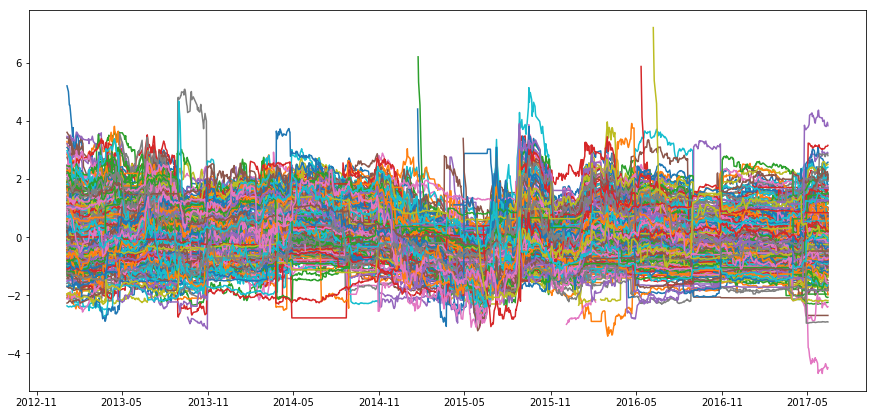

2013-01-04 15:00:00  000001.XSHE    0.428191
                     000002.XSHE   -0.561632
                     000008.XSHE    2.155853
                     000009.XSHE    2.304650
                     000027.XSHE    0.777546
                     000039.XSHE    1.285662
                     000060.XSHE    1.232017
                     000061.XSHE    7.113348
                     000063.XSHE    2.478872
                     000069.XSHE   -3.194890
                     000100.XSHE    0.377899
                     000157.XSHE    2.013883
                     000338.XSHE   -2.365980
                     000402.XSHE   -1.023371
                     000413.XSHE    3.612551
                     000415.XSHE   -1.853996
                     000423.XSHE   -2.354280
                     000425.XSHE    1.989121
                     000503.XSHE    5.015045
                     000538.XSHE    0.376945
                     000540.XSHE   -1.842990
                     000568.XSHE    0.544935
          

/Users/calvinku/anaconda/envs/fxdayu/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
/Users/calvinku/anaconda/envs/fxdayu/lib/python2.7/site-packages/alphalens/plotting.py:767: FutureWarning: pd.rolling_apply is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(center=False,min_periods=1,window=5).apply(args=<tuple>,func=<function>,kwargs=<dict>)
  min_periods=1, args=(period,))
/Users/calvinku/anaconda/envs/fxdayu/lib/python2.7/site-packages/alphalens/plotting.py:767: FutureWarning: pd.rolling_apply is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(center=False,min_periods=1,window=10).apply(args=<tuple>,func=<function>,kwargs=<dict>)
  min_periods=1, args=(period,))


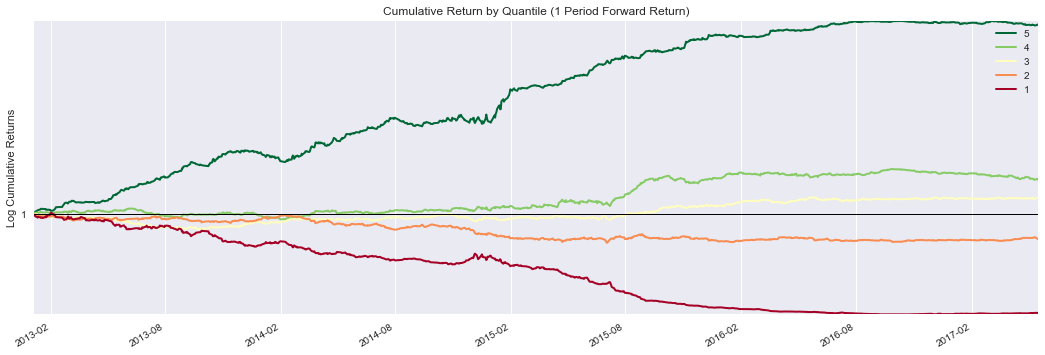

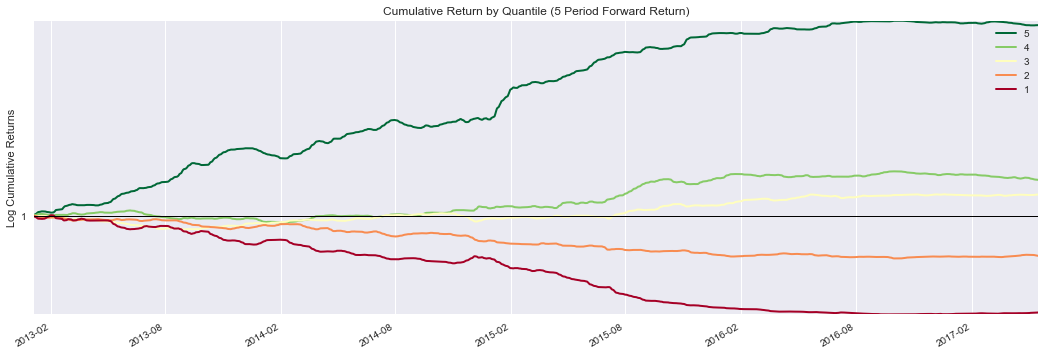

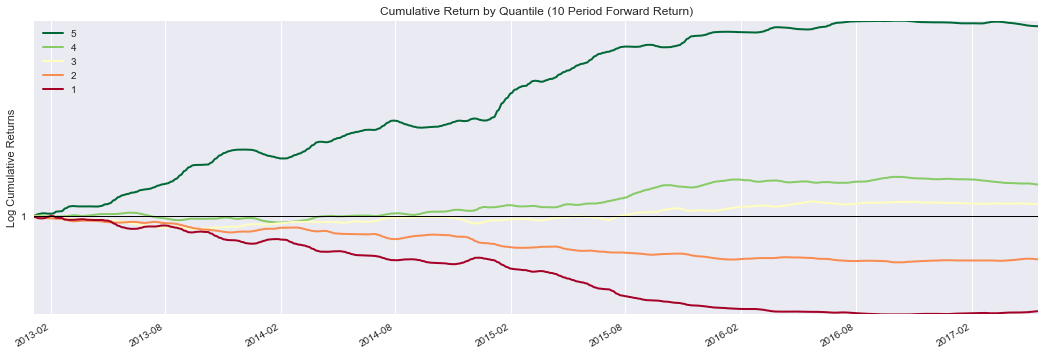

                  1         5         10
date                                    
2013-01-31  0.030187  0.022141  0.045982
2013-02-28  0.081180  0.200605  0.223574
2013-03-31  0.029115  0.001686 -0.000692
2013-04-30 -0.005585 -0.005875  0.055055
2013-05-31  0.076838  0.155637  0.160561
2013-06-30 -0.001093 -0.011983 -0.015616
2013-07-31  0.005509 -0.001042  0.015651
2013-08-31  0.093309  0.169187  0.246452
2013-09-30  0.015461  0.045146  0.067688
2013-10-31  0.095883  0.195666  0.283016
2013-11-30  0.031245  0.060681  0.071255
2013-12-31 -0.005714 -0.093967 -0.155547
2014-01-31 -0.040528 -0.049130 -0.003361
2014-02-28  0.098460  0.192683  0.265511
2014-03-31  0.106865  0.228886  0.264133
2014-04-30 -0.008384  0.010643  0.042407
2014-05-31  0.054008  0.098009  0.126504
2014-06-30  0.021038  0.048273  0.094861
2014-07-31  0.113076  0.203789  0.194437
2014-08-31 -0.010891 -0.076328 -0.103536
2014-09-30  0.055877  0.090212  0.106526
2014-10-31  0.059481  0.079768  0.118791
2014-11-30  0.01

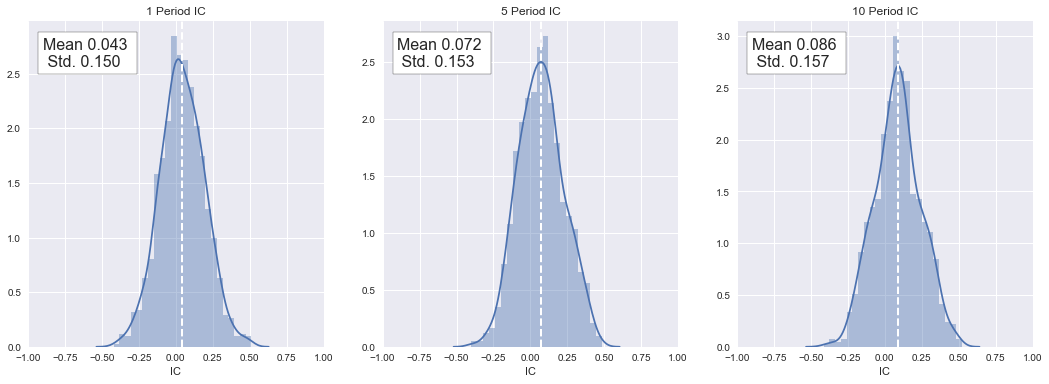

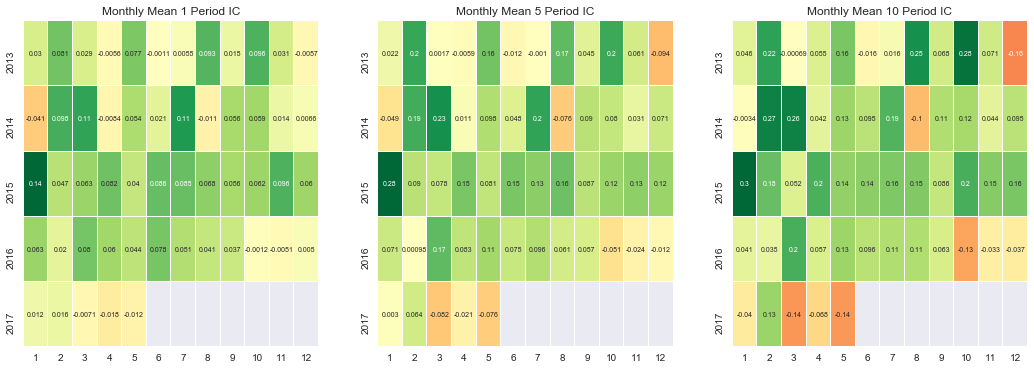

In [1]:
#导入包#
from fxdayu_data import DataAPI
from datetime import datetime
import tushare as ts
import numpy as np
# from sklearn import preprocessing
import matplotlib.pyplot as plt
import pandas as pd

#从bundle里获取财务指标    
PN = DataAPI.factor('HS300', ('ROE', 'PB', 'SFY12P','FinancingCashGrowRate'), start=datetime(2013, 1, 1))
close = DataAPI.candle('HS300', 'D', 'close')
prices = close.minor_xs('close')
#测试是否获取数据，打印出来
print PN
print prices

#对数据进行极值处理和标准化处理
def winsorize(df):
       q = df.quantile([0.025, 0.975])
       if isinstance(q, pd.Series) and len(q) == 2:
          df[df < q.iloc[0]] = q.iloc[0]
          df[df > q.iloc[1]] = q.iloc[1]
       return df

def standardize(df):
      df_std = df.std()
      df_mean = df.mean()
      return (df - df_mean) / df_std

S_ROE_PB= standardize(winsorize(PN.minor_xs('ROE')/PN.minor_xs('PB')))
S_SFY = standardize(winsorize(PN.minor_xs('SFY12P')))
S_FCG = standardize(winsorize(PN.minor_xs('FinancingCashGrowRate')))


fig = plt.figure(figsize=(15, 7))
plt.plot(S_ROE_PB)
plt.show()

#合成因子
S = (S_ROE_PB+S_SFY)
factor = S.stack()

print(factor)

#求Quantile收益，根据分组测试各组的收益表
import alphalens
factor_data = alphalens.utils.get_clean_factor_and_forward_returns(factor, prices, quantiles=5)
factor_data
mean_return_by_q, std_err_by_q = alphalens.performance.mean_return_by_quantile(factor_data, by_date=True)
alphalens.plotting.plot_cumulative_returns_by_quantile(mean_return_by_q, 1)
alphalens.plotting.plot_cumulative_returns_by_quantile(mean_return_by_q, 5)
alphalens.plotting.plot_cumulative_returns_by_quantile(mean_return_by_q, 10)
plt.show()

#计算IC值
ic = alphalens.performance.factor_information_coefficient(factor_data)
# print ic
alphalens.plotting.plot_ic_hist(ic)
mean_monthly_ic = alphalens.performance.mean_information_coefficient(factor_data, by_time='M')
print mean_monthly_ic
alphalens.plotting.plot_monthly_ic_heatmap(mean_monthly_ic)
plt.show()


excel_data = factor_data[factor_data.factor_quantile==5].factor_quantile.unstack().replace(np.nan, 0).replace(5, 1)
excel_data.to_excel('factor.xlsx')



In [5]:
excel_data.head()

asset,000001.XSHE,000002.XSHE,000008.XSHE,000009.XSHE,000027.XSHE,000039.XSHE,000060.XSHE,000061.XSHE,000063.XSHE,000069.XSHE,...,601933.XSHG,601939.XSHG,601958.XSHG,601985.XSHG,601988.XSHG,601989.XSHG,601998.XSHG,603000.XSHG,603885.XSHG,603993.XSHG
date,,,,,,,,,,,,,,,,,,,,,
2013-01-04 15:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2013-01-07 15:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2013-01-08 15:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2013-01-09 15:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2013-01-10 15:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


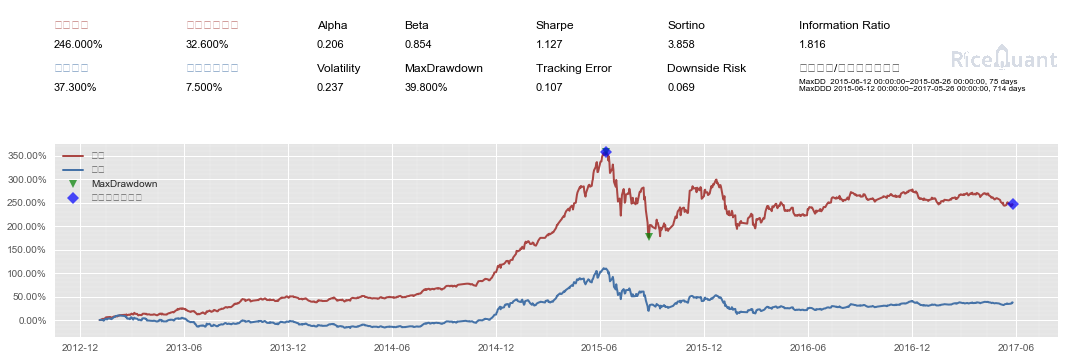

In [4]:
#开始进行回测#


config = {
  "base": {
    "start_date": "2013-01-04",
    "end_date": "2017-05-30",
    "benchmark": "000300.XSHG",
    "accounts": {
        "stock": 100000
    }
  },
  "extra": {
    "log_level": "info",
  },
  "mod": {
    "sys_analyser": {
      "enabled": True,
      "plot": True,
    },
  }
}


from rqalpha.api import *
from rqalpha import run_func
import numpy as np
import talib as ta
import pandas as pd
import os

def init(context):
    codes = pd.read_excel('factor.xlsx')
    codes.index = codes.pop('date')
    context.codes = codes
    scheduler.run_monthly(find_pool, tradingday=1)
#     scheduler.run_quarterly(find_pool)

def find_pool(context, bar_dict):
    codes = context.codes.loc[context.now]
    stocks = codes.index[codes == True]
    context.stocks = stocks

def handle_bar(context, bar_dict):
    pool = context.stocks
    if pool is not None:
        stocks_len = len(pool)
        for stocks in context.portfolio.positions:
            if stocks not in pool:
                order_target_percent(stocks, 0)
        result = []
        for codes in pool:
            if codes not in result and codes not in context.portfolio.positions:
                result.append(codes)
        if len(result):
            for r in result:
                order_target_percent(r, 1.0/stocks_len)

results = run_func(init=init, handle_bar=handle_bar, config=config)